In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# loading data for exoplanet data (epdf) and transit spectroscopy (transdata)

epdata = pd.read_csv("../input/exoplanet-spectroscopy-exoplanetarchive/002PS_2022.07.13_08.13.48.csv")
transdata = pd.read_csv("../input/exoplanet-spectroscopy-exoplanetarchive/001transitspec_2022.07.13_08.17.50.csv")
emdata = pd.read_csv("../input/exoplanet-spectroscopy-exoplanetarchive/003emissionspec_2022.07.13_08.07.04.csv")
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# research questions:
# 1. Are there useful grouping of exoplanets? (clustering)
# 2. There is a lot of missing data. Can we estimate what these missing
#    values might be, given other exoplanet attributes? 
# 3. Which grouping of planets most resemble Earth in physical and chemcial attributes?
# 4. Can we use these data to make renderings of what we think these planets look like?

In [3]:
# transforming data into dataframes
# running correllations on exoplanet data

epdf = pd.DataFrame(epdata)
corr = epdf.corr()

transdf = pd.DataFrame(transdata)
emdf = pd.DataFrame(emdata)

In [4]:
# unstacking correlations and sorting to examine highly correlated features

uscorr = corr.unstack()
uscorrs = uscorr.sort_values(kind="quicksort")

In [5]:
# displaying maximum columns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [6]:
import seaborn as sn
import matplotlib.pyplot as plt

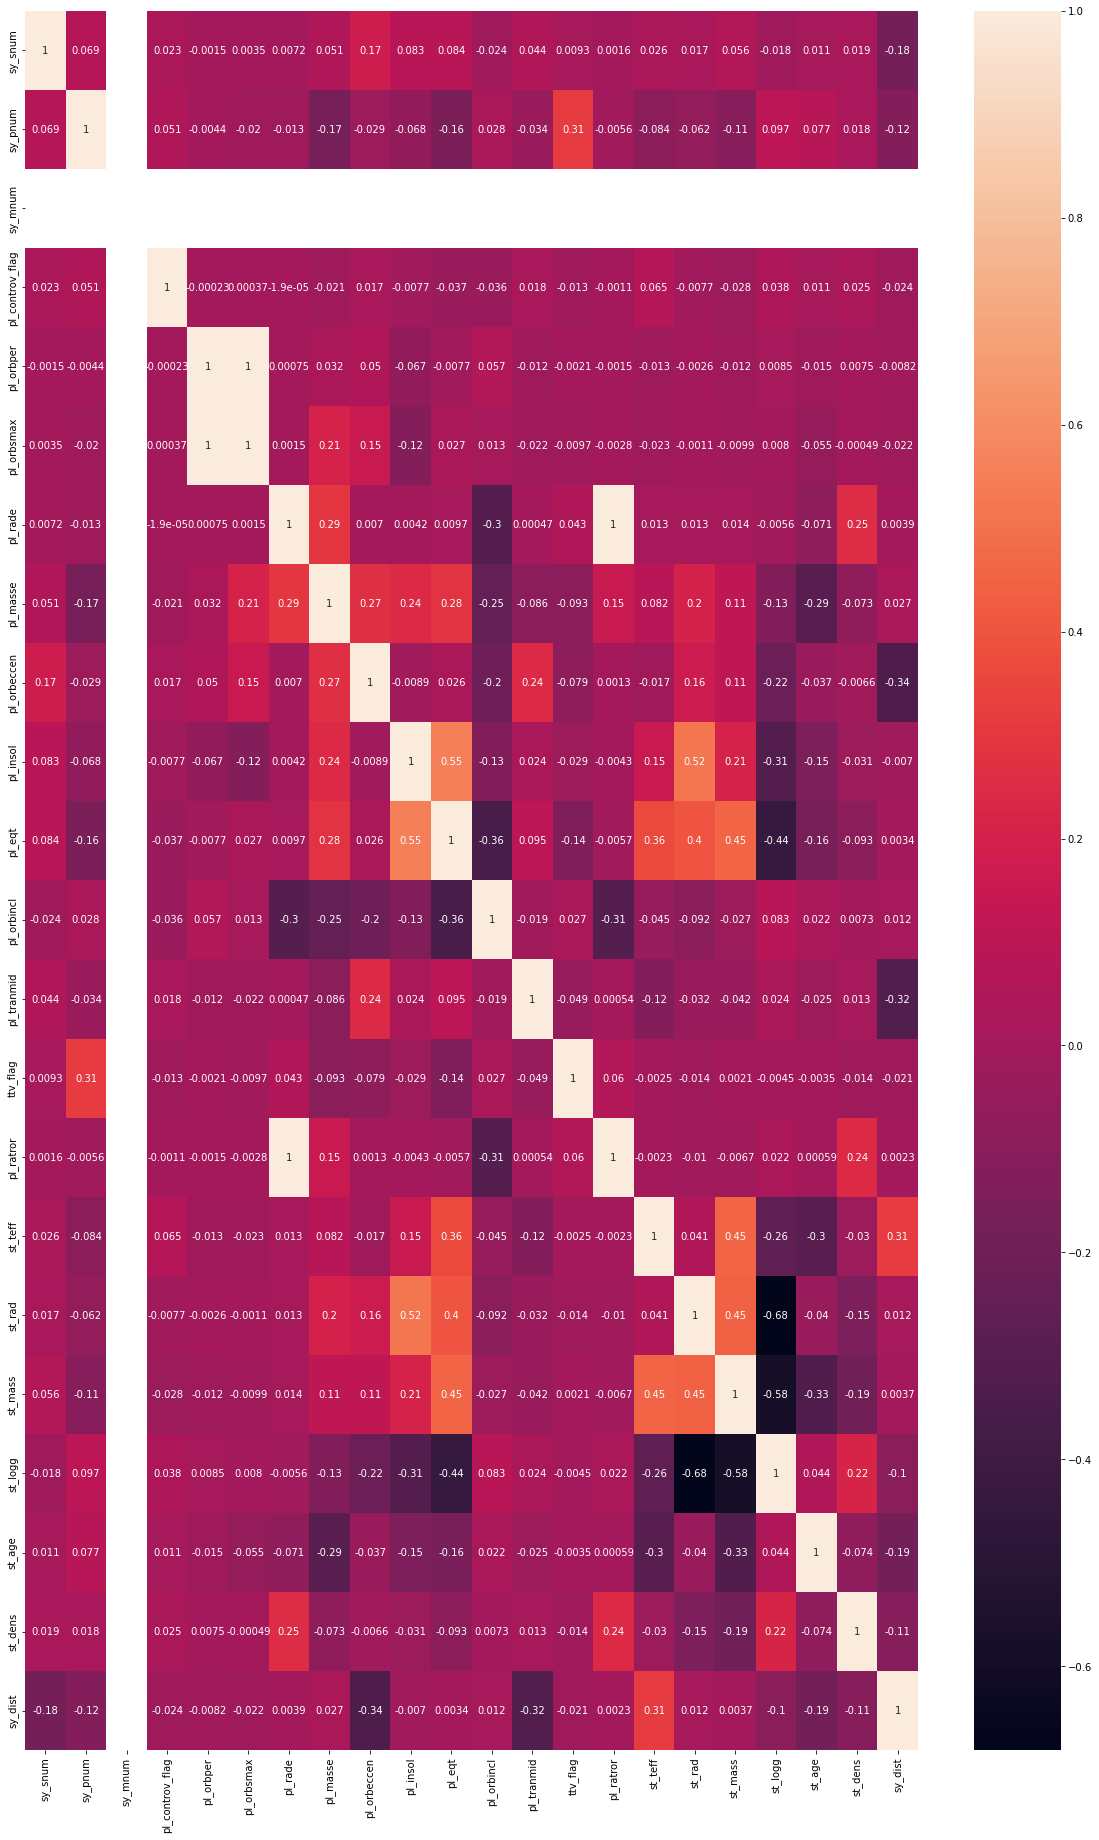

In [7]:
# creating a heatmap to visualize corelations

plt.figure(figsize=(20, 32))
sn.heatmap(corr, annot=True)
plt.show()

<AxesSubplot:xlabel='st_age', ylabel='pl_insol'>

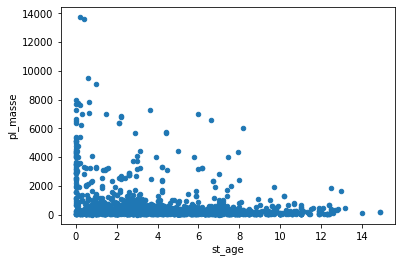

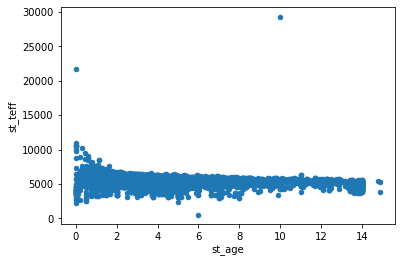

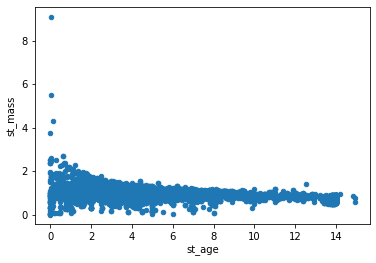

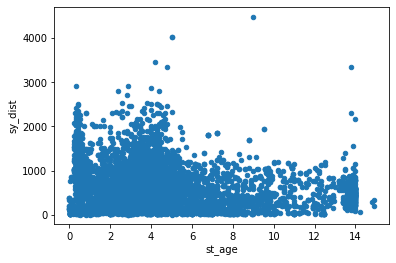

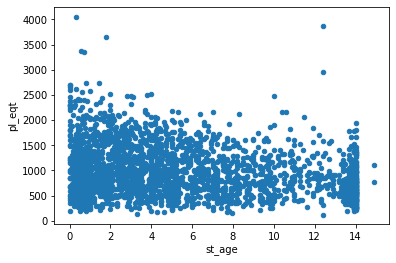

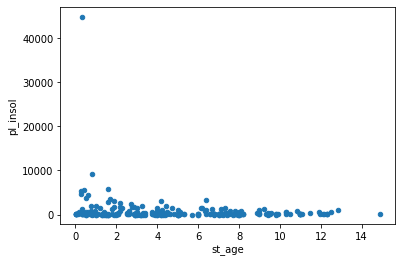

In [8]:
# plotting correlated features

epdf.plot.scatter(x="st_age",y="pl_masse")
epdf.plot.scatter(x="st_age",y="st_teff")
epdf.plot.scatter(x="st_age",y="st_mass")
epdf.plot.scatter(x="st_age",y="sy_dist")
epdf.plot.scatter(x="st_age",y="pl_eqt")
epdf.plot.scatter(x="st_age",y="pl_insol")

In [9]:
# creating table of only planet names and their central wave lengths
# rounding central wave lengths to make managable dummy variable categories

plntcentralwavelng = transdata.loc[:, 'plntname':'centralwavelng'].round(decimals = 2)
plntcentralwavelng.head()

,plntname,centralwavelng
0,WASP-12 b,0.34
1,WASP-12 b,0.40
2,WASP-12 b,0.50
3,WASP-12 b,0.55
4,WASP-12 b,0.56


In [10]:
# creating dummy variables for different grouping of central wave lengths

plntcentralwavelngdummy = pd.concat([plntcentralwavelng, pd.get_dummies(plntcentralwavelng.centralwavelng)], 1).groupby(['plntname']).sum().reset_index()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
# visualizing dummy variables

plntcentralwavelngdummy.head()

,plntname,centralwavelng,0.2,0.22,0.24,0.26,0.27,0.28,0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.4,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.5,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.6,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.7,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.8,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.0,1.01,1.02,1.03,1.04,1.06,1.07,1.08,1.09,1.1,1.11,1.12,1.13,1.14,1.15,1.16,1.17,1.18,1.19,1.2,1.21,1.22,1.23,1.24,1.25,1.26,1.27,1.28,1.29,1.3,1.31,1.32,1.33,1.34,1.35,1.36,1.37,1.38,1.39,1.4,1.41,1.42,1.43,1.44,1.45,1.46,1.47,1.48,1.49,1.5,1.51,1.52,1.53,1.54,1.55,1.56,1.57,1.58,1.59,1.6,1.61,1.62,1.63,1.64,1.65,1.66,1.68,1.69,1.71,1.72,1.73,1.75,1.76,1.77,1.78,1.79,1.83,1.84,1.87,1.89,1.92,1.94,1.95,1.96,2.0,2.01,2.06,2.07,2.1,2.11,2.12,2.14,2.15,2.17,2.18,2.19,2.2,2.23,2.24,2.27,2.28,2.29,2.3,2.31,2.34,2.35,2.41,2.46,2.47,3.52,3.54,3.55,3.56,3.6,4.47,4.49,4.5,5.8,7.85,8.0,24.0
0,55 Cnc e,70.23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,2,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0
1,CoRoT-1 b,29.02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,GJ 1132 b,148.88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,1,1,0,1,0,1,0,1,0,1,0,1,0,2,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,2,2,1,3,1,3,2,2,3,2,2,2,3,1,3,2,2,1,0,0,2,3,1,1,2,3,1,2,2,3,0,3,1,2,0,4,1,3,2,1,2,1,1,2,3,2,3,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,GJ 1214 b,171.18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,3,1,0,0,0,0,0,0,0,1,0,0,2,1,2,1,3,0,2,0,1,0,1,1,2,0,3,0,4,0,3,2,5,0,5,0,4,1,9,1,4,0,3,0,2,0,2,0,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,2,0,2,0,0,2,0,2,5,2,0,1,1,0,2,0,2,0,1,1,0,2,0,2,0,2,0,0,2,0,2,0,1,1,0,2,0,2,0,2,0,1,1,0,2,0,3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,3,0,0,0,0
4,GJ 3470 b,233.66,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,1,0,0,0,0,7,0,0,0,0,0,2,0,0,0,0,1,0,0,4,0,4,0,0,0,0,1,0,0,0,0,1,6,2,0,5,1,0,0,0,1,0,0,1,0,0,1,0,7,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,2,3,1,4,2,4,3,2,4,2,2,3,2,2,2,4,2,3,2,2,2,4,2,3,2,2,2,4,1,4,2,2,2,3,2,4,2,2,2,3,2,4,2,2,2,3,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [12]:
# many exoplanets have multiple observations with varying results;
# because we want to only have once instance of each exoplanet, a column was created to count how many columns per row 
# contained values and kept the observations with the highest amount of data per exoplanet.

# a better data manipulator may instaead want to merge duplicate exoplanet rows somehow.

datacount = epdf.count(axis="columns")
epdf["datacount"] = datacount
epdf.datacount = epdf.datacount.astype(float)
epdf = epdf.sort_values(["datacount"])
epdf.head()

,pl_name,sy_snum,sy_pnum,sy_mnum,pl_controv_flag,pl_orbper,pl_orbsmax,pl_rade,pl_masse,pl_orbeccen,pl_insol,pl_eqt,pl_orbincl,pl_tranmid,ttv_flag,pl_ratror,st_spectype,st_teff,st_rad,st_mass,st_metratio,st_logg,st_age,st_dens,sy_refname,sy_dist,rowupdate,datacount
30911,OGLE-2013-BLG-0341L B b,2,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=GOULD_ET_AL__2014 href=https://ui.ad...,NaN,05/12/2019,8.0
30887,OGLE-2012-BLG-0406L b,1,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=TSAPRAS_ET_AL__2014 href=https://ui....,NaN,05/12/2019,8.0
30996,OGLE-2017-BLG-0406L b,1,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=HIRAO_ET_AL__2020 href=https://ui.ad...,NaN,09/07/2020,8.0
31012,OGLE-2017-BLG-1434L b,1,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=UDALSKI_ET_AL__2018 href=https://ui....,NaN,05/12/2019,8.0
30990,OGLE-2016-BLG-1227L b,1,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=HAN_ET_AL__2020 href=https://ui.adsa...,NaN,02/04/2020,8.0


In [13]:
# dropping duplicate exoplanets

uniepdf = epdf.drop_duplicates(subset="pl_name", keep="last")
uniepdf.head()

,pl_name,sy_snum,sy_pnum,sy_mnum,pl_controv_flag,pl_orbper,pl_orbsmax,pl_rade,pl_masse,pl_orbeccen,pl_insol,pl_eqt,pl_orbincl,pl_tranmid,ttv_flag,pl_ratror,st_spectype,st_teff,st_rad,st_mass,st_metratio,st_logg,st_age,st_dens,sy_refname,sy_dist,rowupdate,datacount
31200,SR 12 AB c,2,1,0,0,NaN,NaN,NaN,4131.6200,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,14/05/2014,9.0
4661,KMT-2019-BLG-1953L b,1,1,0,0,NaN,NaN,NaN,200.0000,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.31,NaN,NaN,NaN,NaN,<a refstr=HAN_ET_AL__2020 href=https://ui.adsa...,7040.0000,08/09/2020,11.0
4665,KMT-2021-BLG-0322L b,2,1,0,0,NaN,NaN,NaN,2034.1018,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.62,NaN,NaN,NaN,NaN,<a refstr=HAN_ET_AL__2021 href=https://ui.adsa...,6600.0000,24/01/2022,11.0
622,GJ 676 A c,2,4,0,0,7337.0,6.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,16.0272,27/09/2016,11.0
30808,MXB 1658-298 b,2,1,0,0,760.0,1.613,NaN,7532.5710,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=LEWIN__AMP__JOSS_1981 href=https://u...,NaN,26/07/2017,11.0


In [14]:
# merging transit spectroscopy and exoplanet data

eptransmerge = plntcentralwavelngdummy.merge(uniepdf, left_on="plntname", right_on="pl_name")

In [15]:
# dropping columns we don't need

eptransmerge = eptransmerge.drop(columns = ["centralwavelng", "datacount","pl_name","pl_controv_flag", "sy_refname","sy_dist", "rowupdate","st_metratio","st_spectype", "plntname"])
eptransmerge.dropna()
eptransmerge.head()

,0.2,0.22,0.24,0.26,0.27,0.28,0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.4,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.5,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.6,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.7,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.8,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.0,1.01,1.02,1.03,1.04,1.06,1.07,1.08,1.09,1.1,1.11,1.12,1.13,1.14,1.15,1.16,1.17,1.18,1.19,1.2,1.21,1.22,1.23,1.24,1.25,1.26,1.27,1.28,1.29,1.3,1.31,1.32,1.33,1.34,1.35,1.36,1.37,1.38,1.39,1.4,1.41,1.42,1.43,1.44,1.45,1.46,1.47,1.48,1.49,1.5,1.51,1.52,1.53,1.54,1.55,1.56,1.57,1.58,1.59,1.6,1.61,1.62,1.63,1.64,1.65,1.66,1.68,1.69,1.71,1.72,1.73,1.75,1.76,1.77,1.78,1.79,1.83,1.84,1.87,1.89,1.92,1.94,1.95,1.96,2.0,2.01,2.06,2.07,2.1,2.11,2.12,2.14,2.15,2.17,2.18,2.19,2.2,2.23,2.24,2.27,2.28,2.29,2.3,2.31,2.34,2.35,2.41,2.46,2.47,3.52,3.54,3.55,3.56,3.6,4.47,4.49,4.5,5.8,7.85,8.0,24.0,sy_snum,sy_pnum,sy_mnum,pl_orbper,pl_orbsmax,pl_rade,pl_masse,pl_orbeccen,pl_insol,pl_eqt,pl_orbincl,pl_tranmid,ttv_flag,pl_ratror,st_teff,st_rad,st_mass,st_logg,st_age,st_dens
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,2,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,2,5,0,0.736544,0.01544,2.080,7.81,0.061,NaN,1958.0,87.30,2455568.027,0,0.02020,5234.0,0.94,0.91,4.45,NaN,NaN
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1.508956,NaN,16.700,327.35,0.000,NaN,1898.0,85.10,2454159.453,0,0.13880,5950.0,1.11,0.95,4.25,NaN,NaN
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,1,1,0,1,0,1,0,1,0,1,0,1,0,2,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,2,2,1,3,1,3,2,2,3,2,2,2,3,1,3,2,2,1,0,0,2,3,1,1,2,3,1,2,2,3,0,3,1,2,0,4,1,3,2,1,2,1,1,2,3,2,3,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,1.628930,NaN,1.160,1.62,0.000,NaN,409.0,NaN,2457184.558,0,0.05120,3270.0,0.21,0.18,NaN,5.0,29.60
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,3,1,0,0,0,0,0,0,0,1,0,0,2,1,2,1,3,0,2,0,1,0,1,1,2,0,3,0,4,0,3,2,5,0,5,0,4,1,9,1,4,0,3,0,2,0,2,0,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,2,0,2,0,0,2,0,2,5,2,0,1,1,0,2,0,2,0,1,1,0,2,0,2,0,2,0,0,2,0,2,0,1,1,0,2,0,2,0,2,0,1,1,0,2,0,3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,3,0,0,0,0,1,1,0,1.580404,0.01490,2.742,8.17,0.063,21.0,596.0,88.70,2455701.413,0,NaN,3250.0,0.21,0.18,5.03,NaN,25.40
4,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,1,0,0,0,0,7,0,0,0,0,0,2,0,0,0,0,1,0,0,4,0,4,0,0,0,0,1,0,0,0,0,1,6,2,0,5,1,0,0,0,1,0,0,1,0,0,1,0,7,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,2,3,1,4,2,4,3,2,4,2,2,3,2,2,2,4,2,3,2,2,2,4,2,3,2,2,2,4,1,4,2,2,2,3,2,4,2,2,2,3,2,4,2,2,2,3,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,3.336649,0.03100,3.880,13.73,0.017,NaN,604.0,88.88,2455983.705,0,0.07642,3652.0,0.48,0.51,4.78,2.5,6.51


In [16]:
# transforming data into floats for model training

eptransmerge = eptransmerge.astype(float)
dtypes = eptransmerge.dtypes
print(dtypes)

0.2            float64
0.22           float64
0.24           float64
0.26           float64
0.27           float64
0.28           float64
0.3            float64
0.31           float64
0.32           float64
0.33           float64
0.34           float64
0.35           float64
0.36           float64
0.37           float64
0.38           float64
0.39           float64
0.4            float64
0.41           float64
0.42           float64
0.43           float64
0.44           float64
0.45           float64
0.46           float64
0.47           float64
0.48           float64
0.49           float64
0.5            float64
0.51           float64
0.52           float64
0.53           float64
0.54           float64
0.55           float64
0.56           float64
0.57           float64
0.58           float64
0.59           float64
0.6            float64
0.61           float64
0.62           float64
0.63           float64
0.64           float64
0.65           float64
0.66           float64
0.67       

In [17]:
# dropping all NA entries

eptransmerge = eptransmerge.dropna(axis=1)
eptransmerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 102
Columns: 202 entries, 0.2 to ttv_flag
dtypes: float64(202)
memory usage: 163.4 KB


In [18]:
from sklearn.cluster import MeanShift

In [19]:
# need to learn more about unsupervised learning

clustering = MeanShift().fit(eptransmerge)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [20]:
clustering.labels_

array([0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 6, 4, 0, 0, 0, 0,
       0, 0, 0, 4, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 5, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2])